# <center>Data Science Jobs Trends Analysis<center>
## <center>Bentaleb Saad - YouCode<center>

In [81]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns


In [82]:
driver = 'SQL Server'
server = 'LAPTOP-K8C2EPLP\SQLEXPRESS'
database = 'data_science_jobs'


connection_string = f"""
                            DRIVER={driver};
                            SERVER={server};
                            DATABASE={database};
                            Trusted_Connection=yes;
"""
connection = pyodbc.connect(connection_string)
cursor = connection.cursor()
cursor

### Job categories distribution

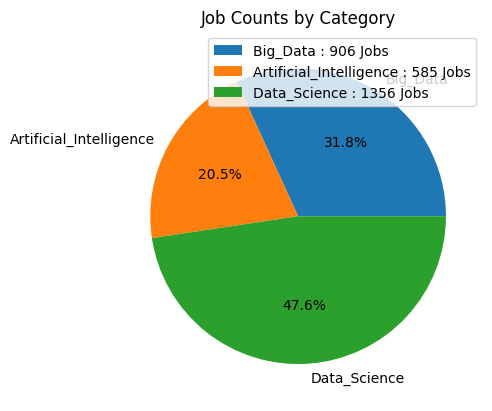

In [83]:

# Query job counts by category
cursor.execute("""
    SELECT Job_category, COUNT(*) AS Job_Count
    FROM Job_posts
    WHERE Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data')
    GROUP BY Job_category
""")

data = cursor.fetchall()
categories = [row[0] for row in data]
job_counts = [row[1] for row in data]
legendd = [row[0] + ' : ' + str(row[1]) + ' Jobs' for row in data   ]
# Plotting the data
plt.title('Job Counts by Category')
# percentage of each category
plt.pie(job_counts, labels=categories, autopct='%1.1f%%')
# add job counts of each category
plt.legend(legendd, loc='upper right')
plt.show()


### Salaries analysis

#### In general

C:\Users\YouCode\AppData\Local\Temp\ipykernel_8560\2114088933.py:32: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



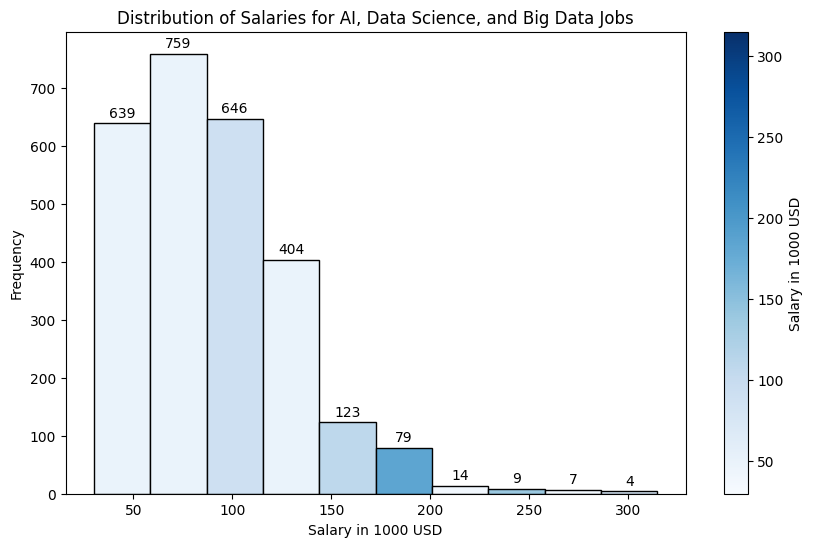

In [99]:
# Salaries distribution for AI, DS, and BD jobs
query = """
    SELECT Salary_in_1000_USD
    FROM Job_posts
    WHERE Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data') and Salary_in_1000_USD > 0
"""

data = cursor.execute(query).fetchall()
salaries = [row[0] for row in data]

# Create a colormap with other than viridis to show the difference 
# between the two plots
colormap = plt.cm.Blues

# Plotting the histogram with gradient colors
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(salaries, bins=10, edgecolor='black')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Normalize the data to [0, 1] to map it to the colormap range
colormap_norm = plt.Normalize(vmin=min(salaries), vmax=max(salaries))
for c, p in zip(colormap_norm(salaries), patches):
    plt.setp(p, 'facecolor', colormap(c))

plt.xlabel('Salary in 1000 USD')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries for AI, Data Science, and Big Data Jobs')

# Show the colorbar for the colormap
sm = plt.cm.ScalarMappable(cmap=colormap, norm=colormap_norm)
sm.set_array([])
plt.colorbar(sm, label='Salary in 1000 USD')

# add values in the middle of the bars
for i in range(len(n)):
    plt.text(bin_centers[i], n[i]+10 + 20, str(int(n[i])), ha='center', va='top')

# Show the plot
plt.show()


#### Per job title

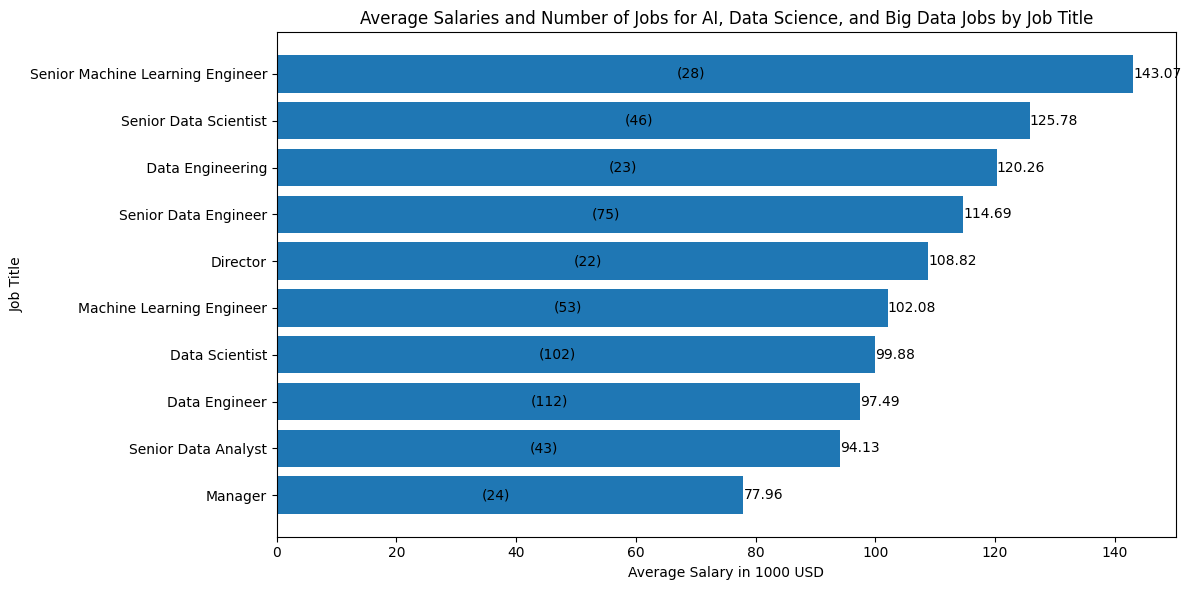

In [100]:
# Query average salaries and number of jobs per job title with at least 20 job posts
query = """
    SELECT TOP 10 jt.Name AS Job_Title, AVG(jp.Salary_in_1000_USD) AS Avg_Salary, COUNT(*) AS Num_Jobs
    FROM Job_posts jp
    INNER JOIN Job_Titles_of_the_job jtoj ON jp.Id = jtoj.Job_id
    INNER JOIN Job_Titles jt ON jtoj.Job_Post_id = jt.Id
    WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data') and jp.Salary_in_1000_USD > 0
    GROUP BY jt.Name
    HAVING COUNT(*) >= 20
    ORDER BY Avg_Salary DESC
"""

cursor.execute(query)
data = cursor.fetchall()
# Reverse the order of the list
data = data[::-1]

# Separate data for the plot
job_titles, avg_salaries, num_jobs = zip(*data)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(job_titles, avg_salaries)  # Switch x-axis with y-axis using barh

# Add values to the center of the bars
for bar, salary, jobs in zip(bars, avg_salaries, num_jobs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{salary:.2f}", ha='left', va='center')
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"({jobs})", ha='right', va='center')

plt.xlabel('Average Salary in 1000 USD')  # Update x-axis label
plt.ylabel('Job Title')  # Update y-axis label
plt.title('Average Salaries and Number of Jobs for AI, Data Science, and Big Data Jobs by Job Title')
plt.tight_layout()
plt.show()


#### Per job category

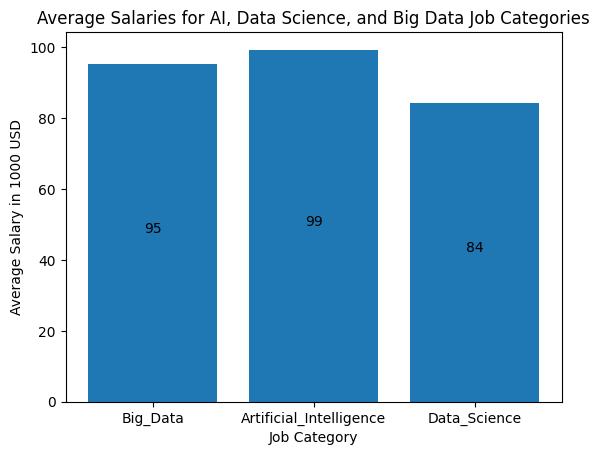

In [105]:
# Query average salaries by job category
cursor.execute("""
    SELECT Job_category, AVG(Salary_in_1000_USD) AS Avg_Salary
    FROM Job_posts
    WHERE Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data') and Salary_in_1000_USD > 0
    GROUP BY Job_category
""")

data = cursor.fetchall()
categories = [row[0] for row in data]
avg_salaries = [row[1] for row in data]

# Plotting the data
plt.bar(categories, avg_salaries)
plt.xlabel('Job Category')
plt.ylabel('Average Salary in 1000 USD')
plt.title('Average Salaries for AI, Data Science, and Big Data Job Categories')
# add value labels
for i in range(len(avg_salaries)):
    plt.text(i, avg_salaries[i]/2, str(round(avg_salaries[i])), ha='center')
plt.show()


C:\Users\YouCode\AppData\Local\Temp\ipykernel_8560\1290025079.py:36: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



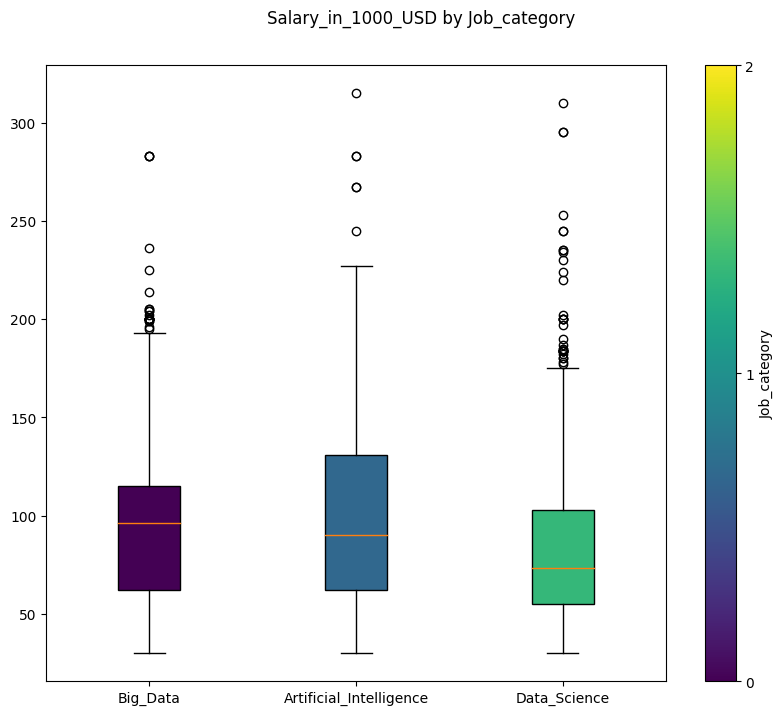

In [106]:

# Salary_in_1000_USD for each of the three groups
query = """
    SELECT Job_category, Salary_in_1000_USD
    FROM Job_posts
    WHERE Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data') AND Salary_in_1000_USD>0
"""

cursor.execute(query)
data = cursor.fetchall()

# Create a colormap with the 'viridis' color scheme
colormap = plt.cm.viridis

# Get unique job categories
job_categories = list(set(row[0] for row in data))

# Separate data for each job category
data_by_category = {category: [row[1] for row in data if row[0] == category] for category in job_categories}

# Plot the box plot
plt.figure(figsize=(10, 8))
box_plot = plt.boxplot(data_by_category.values(), patch_artist=True)

# Apply gradient color to the boxes
for i, box in enumerate(box_plot['boxes']):
    category = job_categories[i]
    box.set(facecolor=colormap(i / len(job_categories)))

# Remove the automatic title added by matplotlib
plt.title('')
plt.suptitle('Salary_in_1000_USD by Job_category', y=0.95)

# Show the colorbar for the colormap
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=len(job_categories) - 1))
sm.set_array([])
plt.colorbar(sm, ticks=range(len(job_categories)), label='Job_category')
plt.xticks(range(1, len(job_categories) + 1), job_categories)

# Show the plot
plt.show()

#### Per country

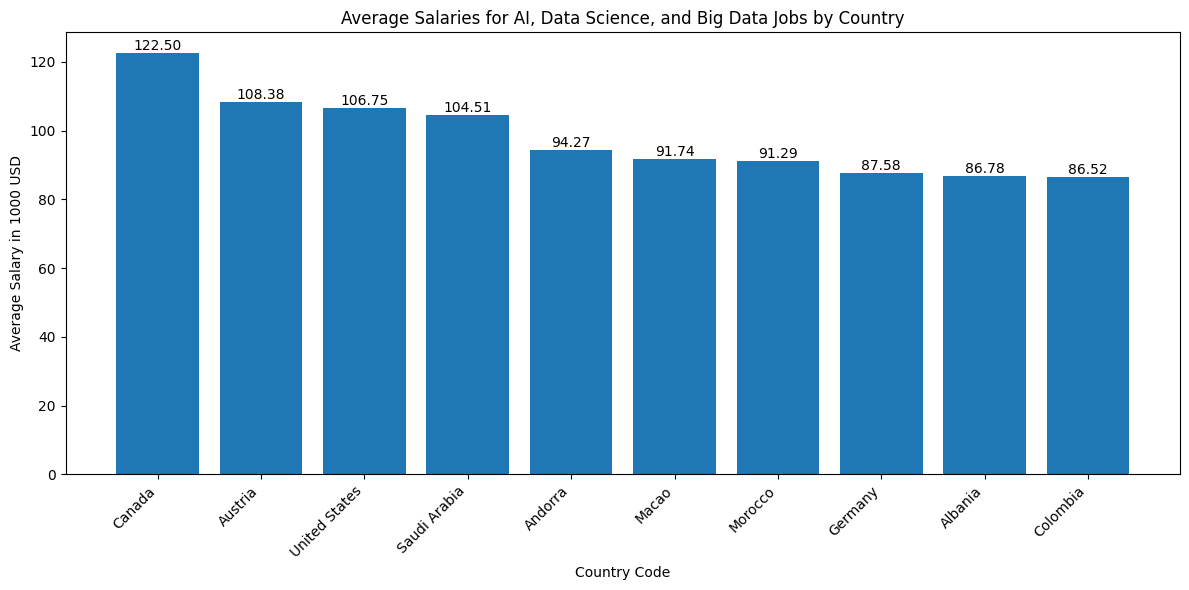

In [107]:
# Query average salaries per country
query = """
    SELECT TOP 11 c.Country_name, AVG(jp.Salary_in_1000_USD) AS Avg_Salary
    FROM Job_posts jp
    INNER JOIN Location l ON jp.Location_id = l.Id
    INNER JOIN Country c ON l.Country_code = c.Country_code
    WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data') AND jp.Salary_in_1000_USD > 0
    GROUP BY c.Country_name
    HAVING COUNT(*) >= 20
    ORDER BY Avg_Salary DESC
"""

cursor.execute(query)
data = cursor.fetchall()

# Separate data for the plot
countries, avg_salaries = zip(*data)

# drop the first element from the tuple
countries = countries[1:]
avg_salaries = avg_salaries[1:]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(countries, avg_salaries)

# Add values to the top of the bars
for i, value in enumerate(avg_salaries):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')

plt.xlabel('Country Code')
plt.ylabel('Average Salary in 1000 USD')
plt.title('Average Salaries for AI, Data Science, and Big Data Jobs by Country')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [108]:
import plotly.express as px
import pandas as pd

# Query average salaries per country
query = """
    SELECT TOP 11 c.Country_name, AVG(jp.Salary_in_1000_USD) AS Avg_Salary
    FROM Job_posts jp
    INNER JOIN Location l ON jp.Location_id = l.Id
    INNER JOIN Country c ON l.Country_code = c.Country_code
    WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data') AND jp.Salary_in_1000_USD > 0
    GROUP BY c.Country_name
    HAVING COUNT(*) >= 20
    ORDER BY Avg_Salary DESC
"""

cursor.execute(query)
data = cursor.fetchall()

# Separate data for the plot
countries, avg_salaries = zip(*data)

# drop the first element from the tuple
countries = countries[1:]
avg_salaries = avg_salaries[1:]

# Convert data to a DataFrame
df = pd.DataFrame({'Country': countries, 'Avg_Salary': avg_salaries})

# Create the world map plot using plotly express
fig = px.choropleth(df, locations=countries, locationmode='country names', color='Avg_Salary',
                    color_continuous_scale='Blues', projection='natural earth',
                    hover_name='Country', hover_data=['Avg_Salary'],
                    title='Average Salaries for AI, Data Science, and Big Data Jobs by Country')

# Show the plot
fig.show()


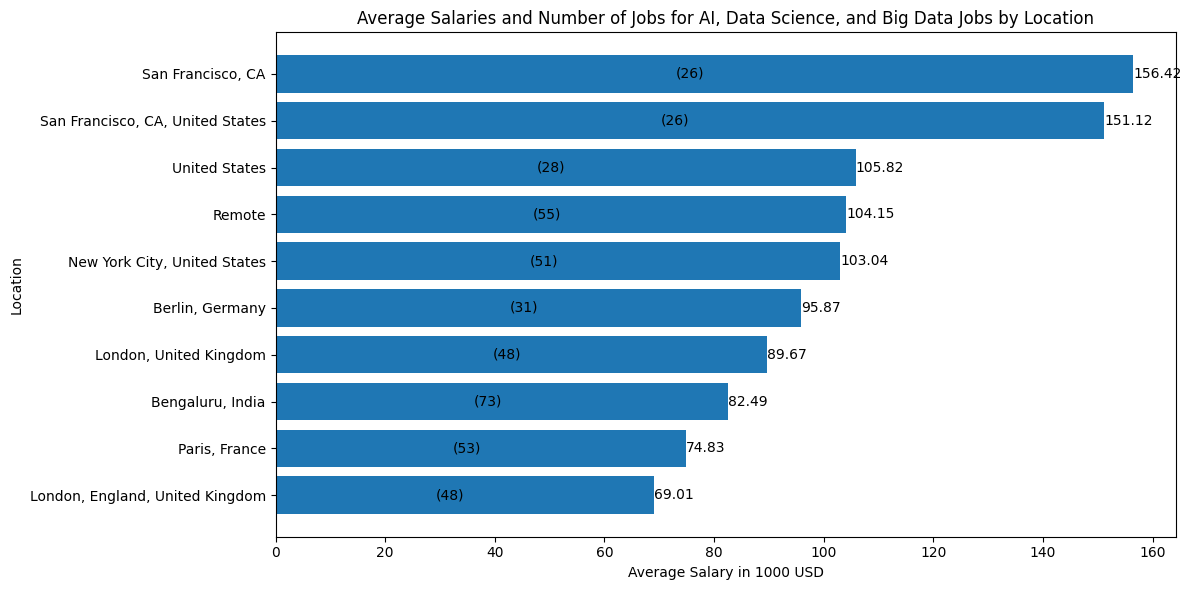

In [109]:
# Query average salaries and number of jobs per location with at least 20 job posts
query = """
    SELECT TOP 10 l.Full_location, AVG(jp.Salary_in_1000_USD) AS Avg_Salary, COUNT(*) AS Num_Jobs
    FROM Job_posts jp
    INNER JOIN Location l ON jp.Location_id = l.Id
    WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data') AND jp.Salary_in_1000_USD > 0
    GROUP BY l.Full_location
    HAVING COUNT(*) >= 20
    ORDER BY Avg_Salary DESC
"""

cursor.execute(query)
data = cursor.fetchall()
# reverse the order of the list
data = data[::-1]

# Separate data for the plot
locations, avg_salaries, num_jobs = zip(*data)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(locations, avg_salaries)  # Switch x-axis with y-axis using barh

# Add values to the center of the bars
for bar, salary, jobs in zip(bars, avg_salaries, num_jobs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{salary:.2f}", ha='left', va='center')
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"({jobs})", ha='right', va='center')

plt.xlabel('Average Salary in 1000 USD')  # Update x-axis label
plt.ylabel('Location')  # Update y-axis label
plt.title('Average Salaries and Number of Jobs for AI, Data Science, and Big Data Jobs by Location')
plt.tight_layout()
plt.show()

#### Per experience level

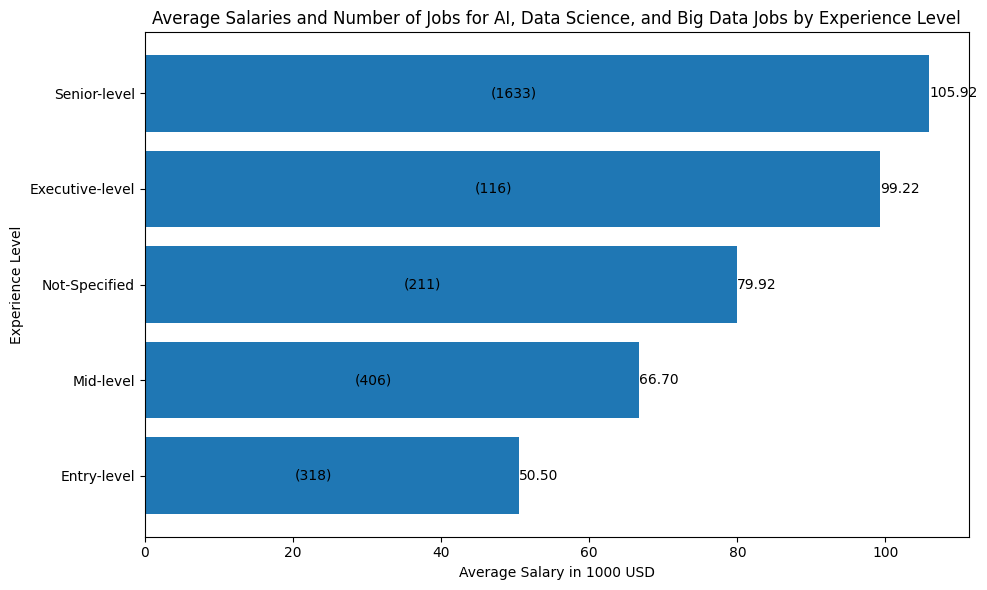

In [110]:
# Query average salaries and number of jobs per location based on experience level
query = """
    SELECT jp.Experience_level, AVG(jp.Salary_in_1000_USD) AS Avg_Salary, COUNT(*) AS Num_Jobs
    FROM Job_posts jp
    WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data') AND jp.Salary_in_1000_USD > 0
    GROUP BY jp.Experience_level
    ORDER BY Avg_Salary DESC
"""

cursor.execute(query)
data = cursor.fetchall()

# Separate data for the plot
experience_levels = [row[0] for row in data]
avg_salaries = [row[1] for row in data]
num_jobs = [row[2] for row in data]
# reverse the order of the lists
experience_levels.reverse()
avg_salaries.reverse()
num_jobs.reverse()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(experience_levels, avg_salaries)  # Switch x-axis with y-axis using barh

# Add values to the center of the bars
for bar, salary, jobs in zip(bars, avg_salaries, num_jobs):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{salary:.2f}", ha='left', va='center')
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f"({jobs})", ha='right', va='center')

plt.xlabel('Average Salary in 1000 USD')  # Update x-axis label
plt.ylabel('Experience Level')  # Update y-axis label
plt.title('Average Salaries and Number of Jobs for AI, Data Science, and Big Data Jobs by Experience Level')
plt.tight_layout()
plt.show()


### Requirements / Job Titles / Facilities analysis

#### Job Requierements tend

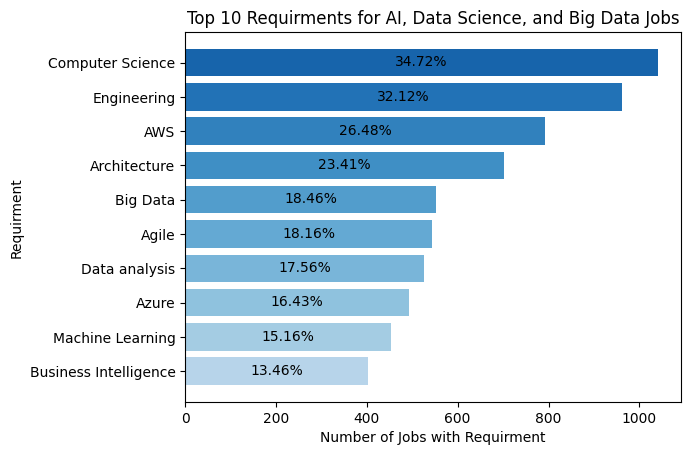

In [92]:
query = """
    WITH RankedReqs AS (
        SELECT r.Name, COUNT(*) AS Occurrences,
               ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS ReqRank
        FROM Job_posts jp
        INNER JOIN Requirment_of_the_job roj ON jp.Id = roj.Job_id
        INNER JOIN Requirments r ON roj.Requirment_of_the_company_id = r.Id
        WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data')
        GROUP BY r.Name
    )
    SELECT Name, Occurrences
    FROM RankedReqs
    WHERE ReqRank <= 10
    ORDER BY Occurrences ASC
"""
data = cursor.execute(query).fetchall()
total_jobs = cursor.execute("SELECT COUNT(*) FROM Job_posts").fetchone()[0]
# add a Blue gradient color to the bars
colors = plt.cm.Blues(np.linspace(0.3, 0.8, len(data)))
# plot the data
plt.barh([row[0] for row in data], [row[1] for row in data], color=colors)
# add values to the plot with percentage of the total jobs
for i, v in enumerate([row[1] for row in data]):
    plt.text(v /2 , i - 0.1, str(round(v / total_jobs * 100, 2)) + '%', ha='center')
plt.xlabel('Number of Jobs with Requirment')
plt.ylabel('Requirment')
plt.title('Top 10 Requirments for AI, Data Science, and Big Data Jobs')
plt.show()

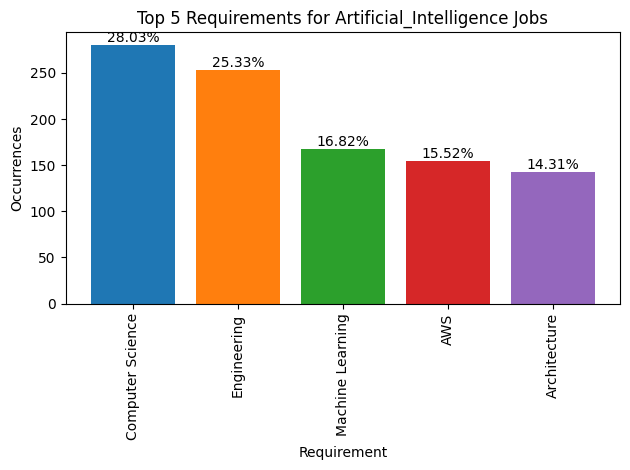

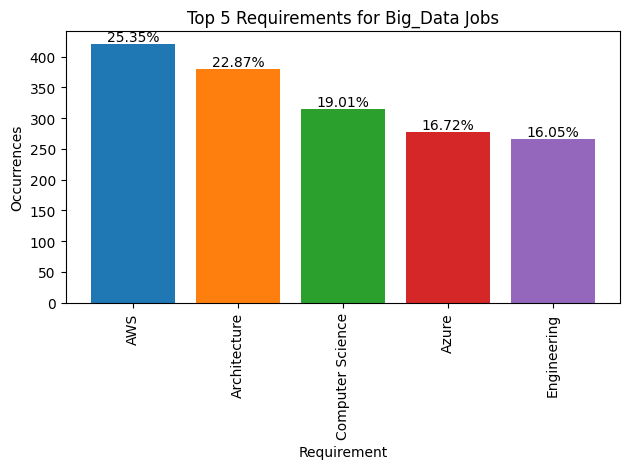

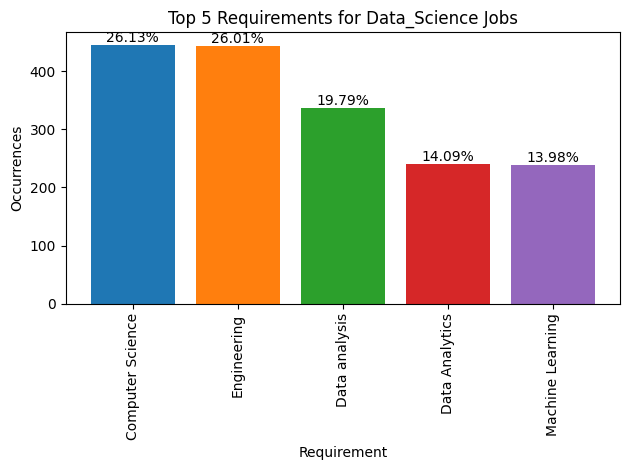

In [93]:
# Query to get the TOP 5 requirements for each job category and their occurrences
query = """
    WITH RankedReqs AS (
        SELECT jp.Job_category, r.Name, COUNT(*) AS Occurrences,
               ROW_NUMBER() OVER (PARTITION BY jp.Job_category ORDER BY COUNT(*) DESC) AS ReqRank
        FROM Job_posts jp
        INNER JOIN Requirment_of_the_job roj ON jp.Id = roj.Job_id
        INNER JOIN Requirments r ON roj.Requirment_of_the_company_id = r.Id
        WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data')
        GROUP BY jp.Job_category, r.Name
    )
    SELECT Job_category, Name, Occurrences
    FROM RankedReqs
    WHERE ReqRank <= 5
    ORDER BY Job_category, Occurrences DESC
"""

# Executing the query
data = cursor.execute(query).fetchall()

# Plotting the data in a single plot with no separation
current_category = None
for row in data:
    if row[0] != current_category:
        current_category = row[0]
        plt.figure()
        plt.title(f"Top 5 Requirements for {current_category} Jobs")
    plt.bar(row[1], row[2])
    plt.xlabel('Requirement')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=90)
    plt.tight_layout()

    # Calculate the percentage of occurrences
    total_jobs_in_category = sum(row[2] for row in data if row[0] == current_category)
    percentage = (row[2] / total_jobs_in_category) * 100

    # Display the percentage on the bar
    plt.text(row[1], row[2], f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()

#### Facilities trend

Text(0.5, 1.0, 'Top 10 Facilities for AI, Data Science, and Big Data Jobs')

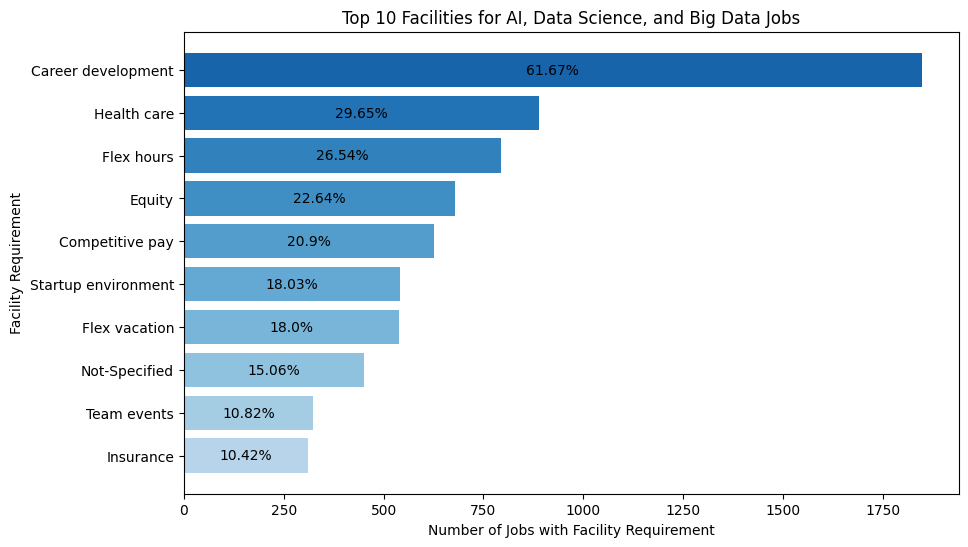

In [94]:
# Analysis for Facilities
query_facilities = """
    WITH RankedFacilities AS (
        SELECT f.Name, COUNT(*) AS Occurrences,
               ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS Rank
        FROM Job_posts jp
        INNER JOIN Facilities_of_the_job foj ON jp.Id = foj.Job_id
        INNER JOIN Facilities f ON foj.Facilitie_id = f.Id
        WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data')
        GROUP BY f.Name
    )
    SELECT Name, Occurrences
    FROM RankedFacilities
    WHERE Rank <= 10
    ORDER BY Occurrences ASC
"""

data_facilities = cursor.execute(query_facilities).fetchall()

# Get the total number of jobs
total_jobs = cursor.execute("SELECT COUNT(*) FROM Job_posts").fetchone()[0]

# Plotting for Facilities
plt.figure(figsize=(10, 6))
colors_facilities = plt.cm.Blues(np.linspace(0.3, 0.8, len(data_facilities)))
plt.barh([row[0] for row in data_facilities], [row[1] for row in data_facilities], color=colors_facilities)
for i, v in enumerate([row[1] for row in data_facilities]):
    plt.text(v / 2, i - 0.1, str(round(v / total_jobs * 100, 2)) + '%', ha='center')
plt.xlabel('Number of Jobs with Facility Requirement')
plt.ylabel('Facility Requirement')
plt.title('Top 10 Facilities for AI, Data Science, and Big Data Jobs')


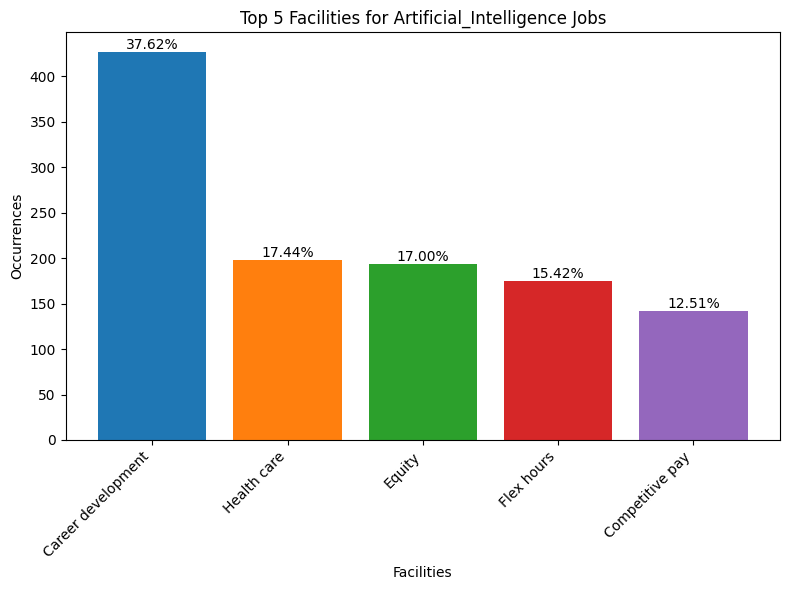

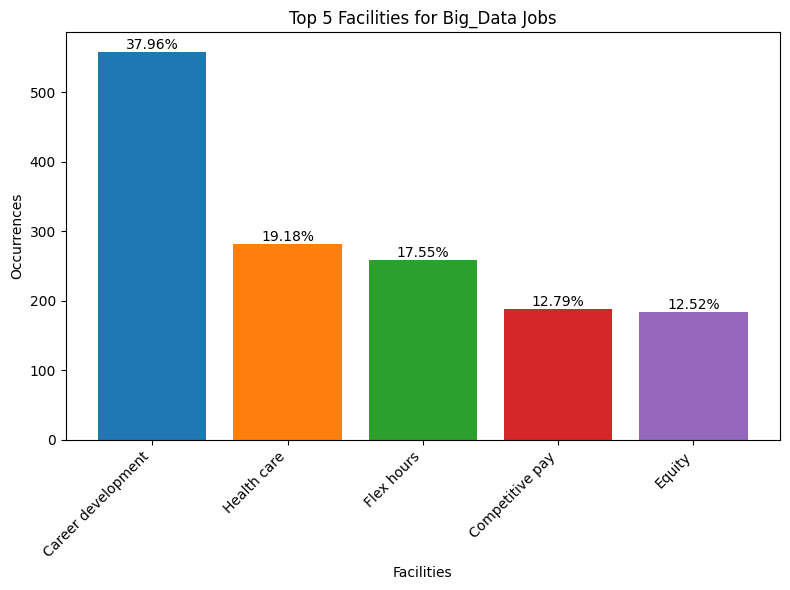

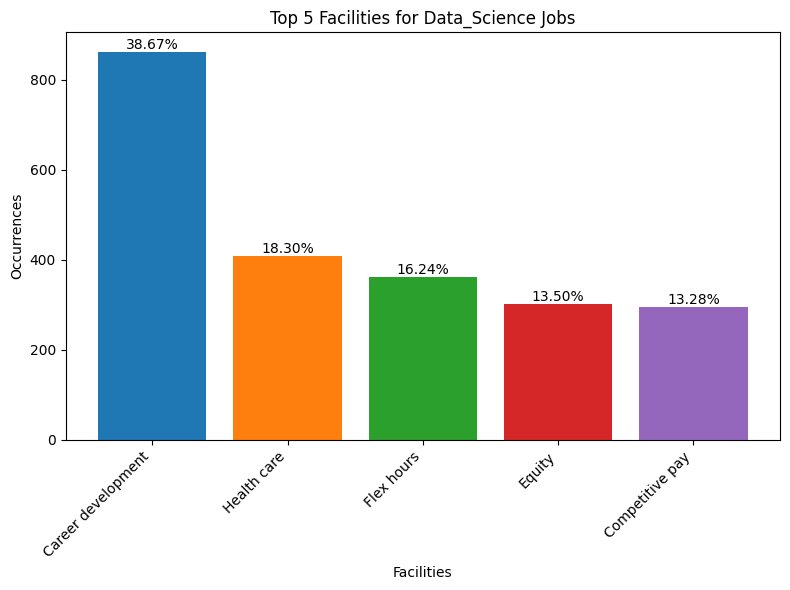

In [95]:
# Analysis for Facilities
query_facilities = """
    WITH RankedFacilities AS (
        SELECT jp.Job_category, f.Name, COUNT(*) AS Occurrences,
               ROW_NUMBER() OVER (PARTITION BY jp.Job_category ORDER BY COUNT(*) DESC) AS Rank
        FROM Job_posts jp
        INNER JOIN Facilities_of_the_job foj ON jp.Id = foj.Job_id
        INNER JOIN Facilities f ON foj.Facilitie_id = f.Id
        WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data')
        GROUP BY jp.Job_category, f.Name
    )
    SELECT Job_category, Name, Occurrences
    FROM RankedFacilities
    WHERE Rank <= 5
    ORDER BY Job_category, Occurrences DESC
"""

data_facilities = cursor.execute(query_facilities).fetchall()

# Plotting the data for Facilities in a single plot with grouped bars
current_category = None
for row in data_facilities:
    if row[0] != current_category:
        current_category = row[0]
        plt.figure(figsize=(8, 6))
        plt.title(f"Top 5 Facilities for {current_category} Jobs")
    plt.bar(row[1], row[2])
    plt.xlabel('Facilities')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

        # Calculate the percentage of occurrences
    total_jobs_in_category = sum(row[2] for row in data_facilities if row[0] == current_category)
    percentage = (row[2] / total_jobs_in_category) * 100

    # Display the percentage on the bar
    plt.text(row[1], row[2], f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()


#### Job titles trend

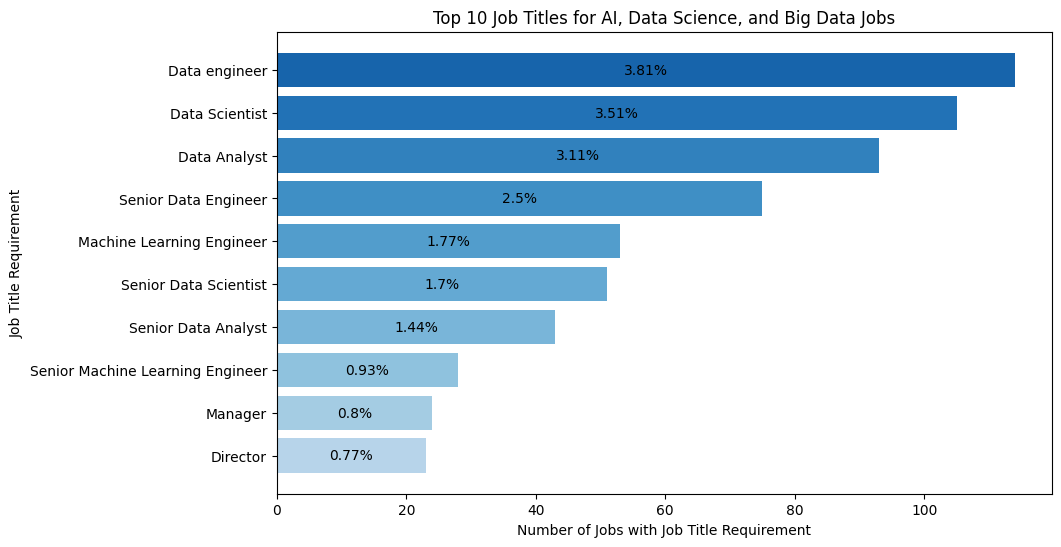

In [96]:
# Analysis for Job Titles
query_job_titles = """
    WITH RankedJobTitles AS (
        SELECT jt.Name, COUNT(*) AS Occurrences,
               ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS Rank
        FROM Job_posts jp
        INNER JOIN Job_Titles_of_the_job jtoj ON jp.Id = jtoj.Job_id
        INNER JOIN Job_Titles jt ON jtoj.Job_Post_id = jt.Id
        WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data')
        GROUP BY jt.Name
    )
    SELECT Name, Occurrences
    FROM RankedJobTitles
    WHERE Rank <= 10
    ORDER BY Occurrences ASC
"""

data_job_titles = cursor.execute(query_job_titles).fetchall()

# Show the plot for job titles
plt.show()

# Plotting for Job Titles
plt.figure(figsize=(10, 6))
colors_job_titles = plt.cm.Blues(np.linspace(0.3, 0.8, len(data_job_titles)))
plt.barh([row[0] for row in data_job_titles], [row[1] for row in data_job_titles], color=colors_job_titles)
for i, v in enumerate([row[1] for row in data_job_titles]):
    plt.text(v / 2, i - 0.1, str(round(v / total_jobs * 100, 2)) + '%', ha='center')
plt.xlabel('Number of Jobs with Job Title Requirement')
plt.ylabel('Job Title Requirement')
plt.title('Top 10 Job Titles for AI, Data Science, and Big Data Jobs')

# Show the plot for Job Titles
plt.show()

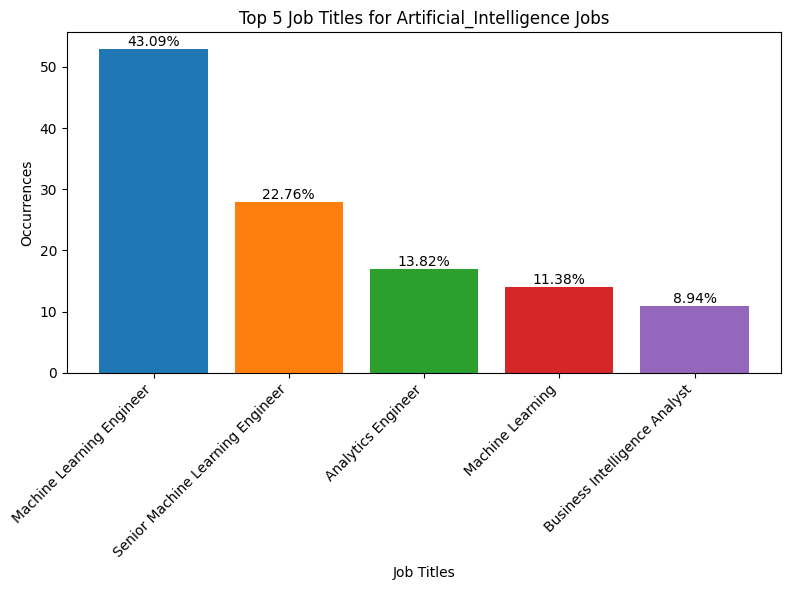

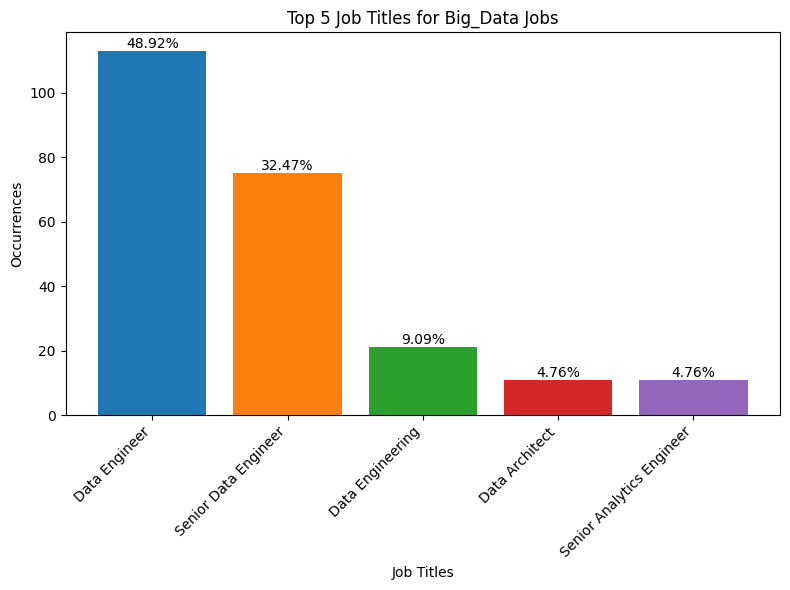

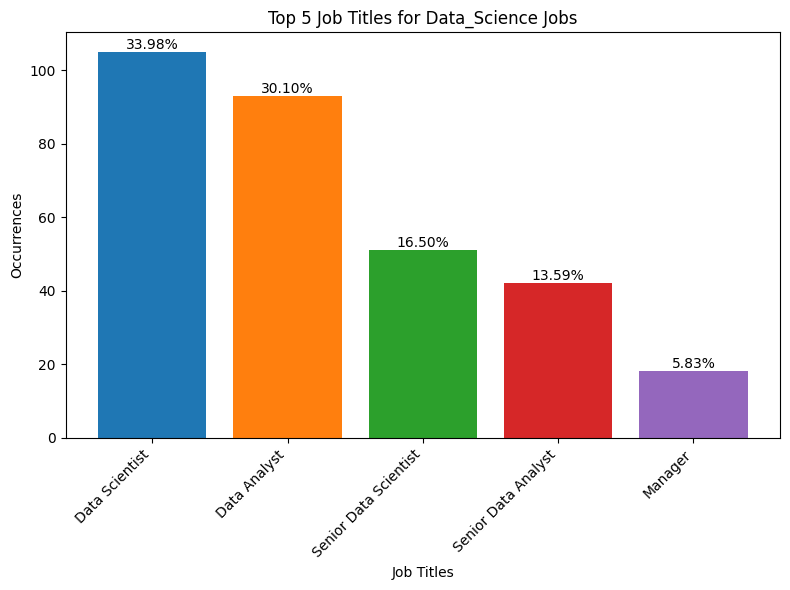

In [97]:
# Analysis for Job Titles
query_job_titles = """
    WITH RankedJobTitles AS (
        SELECT jp.Job_category, jt.Name, COUNT(*) AS Occurrences,
               ROW_NUMBER() OVER (PARTITION BY jp.Job_category ORDER BY COUNT(*) DESC) AS Rank
        FROM Job_posts jp
        INNER JOIN Job_Titles_of_the_job jtoj ON jp.Id = jtoj.Job_id
        INNER JOIN Job_Titles jt ON jtoj.Job_Post_id = jt.Id
        WHERE jp.Job_category IN ('Artificial_Intelligence', 'Data_Science', 'Big_Data')
        GROUP BY jp.Job_category, jt.Name
    )
    SELECT Job_category, Name, Occurrences
    FROM RankedJobTitles
    WHERE Rank <= 5
    ORDER BY Job_category, Occurrences DESC
"""

data_job_titles = cursor.execute(query_job_titles).fetchall()

# Plotting the data for Job Titles in a single plot with grouped bars
current_category = None
for row in data_job_titles:
    if row[0] != current_category:
        current_category = row[0]
        plt.figure(figsize=(8, 6))
        plt.title(f"Top 5 Job Titles for {current_category} Jobs")
    plt.bar(row[1], row[2])
    plt.xlabel('Job Titles')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Calculate the percentage of occurrences
    total_jobs_in_category = sum(row[2] for row in data_job_titles if row[0] == current_category)
    percentage = (row[2] / total_jobs_in_category) * 100

    # Display the percentage on the bar
    plt.text(row[1], row[2], f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()


### Similarities Analysis

C:\Users\YouCode\AppData\Local\Temp\ipykernel_8560\2265364277.py:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Ecplained variance by the first composants PC1 and PCA2 :  0.99933


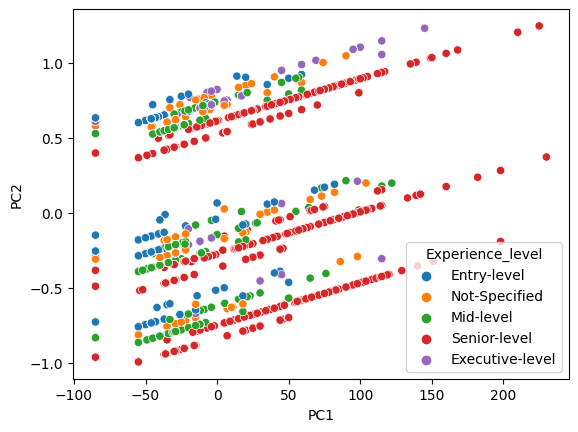

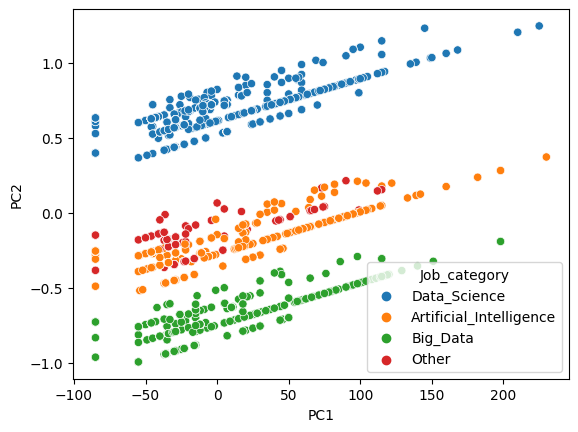

In [98]:
#  Step 1: Load the data
query = """
    SELECT Job_category, Salary_in_1000_USD, Negotiable, Asterisk, Experience_level
    FROM Job_posts
"""
df = pd.read_sql_query(query, connection)

# Step 3: One-hot encode the 'Job_category' column
one_hot = pd.get_dummies(df['Job_category'])
one_hot1 = pd.get_dummies(df['Experience_level'])

experience = df['Experience_level']
categories = df['Job_category']
# Step 4: Concatenate the one-hot encoded columns with the other numerical columns
df = pd.concat([df, one_hot], axis=1)
df = pd.concat([df, one_hot1], axis=1)

# Step 5: Drop the original 'Job_category' column
df.drop('Job_category', axis=1, inplace=True)
df.drop('Experience_level', axis=1, inplace=True)

# Step 6: Apply ACP to reduce the dimensionality of the data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
df_pca = pca.transform(df)

# how much of the variance is explained by the first two principal components
print('Ecplained variance by the first composants PC1 and PCA2 : ', round(pca.explained_variance_ratio_[0] , 5))

# Step 7: Create a DataFrame with the two principal components
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Step 8: Visualise the two principal components with a scatter plot and color each experience level differently
sns.scatterplot(x='PC1', y='PC2', hue=experience, data=df_pca)
plt.show()
# Step 8: Visualise the two principal components with a scatter plot and color each categorie  differently
sns.scatterplot(x='PC1', y='PC2', hue=categories, data=df_pca)
plt.show()